In [1]:
import sys
import os
import random

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# Diffusion, RD, and ACP

143


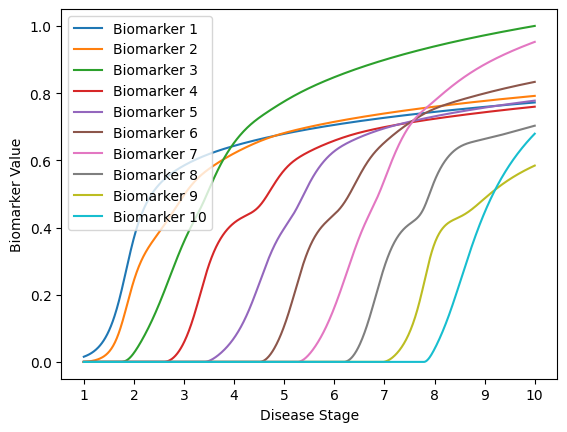

In [2]:
n_biomarker_stages = 10
model_type = 'acp'

# generate the canonical model
seed = random.randint(0,1000)
print(seed)
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=302)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [10]:
# ACP No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)

import numpy as np
if np.any(np.isinf(analyzer.X)):
    print("There is a Nan")

In [11]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [5 9 3 8 2 0 4 7 1 6]


100%|██████████| 10000/10000 [00:02<00:00, 3609.90it/s]


Greedy Ascent Result: [9 8 7 6 5 4 3 1 2 0]


 28%|██▊       | 140362/500000 [00:40<01:39, 3597.96it/s]/home/dsemchin/Progression_models_simulations/simulation_class/ebm/mcmc.py:106: RuntimeWarning: overflow encountered in scalar divide
  if delta_loglike > 0 or np.exp(delta_loglike / temperature) > random.random_sample():
100%|██████████| 500000/500000 [02:23<00:00, 3476.20it/s]

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 1 2 0]
Best Order: [9 8 7 6 5 4 3 1 2 0]
Spearman's Rho: None
Kendall's Tau: SignificanceResult(statistic=-0.9555555555555554, pvalue=5.5114638447971785e-06)


In [7]:
import itertools
import numpy as np
from simulation_class.ebm.likelihood import EventProbabilities

biomarkers = 10 
all_orders = list(itertools.permutations(range(biomarkers))) # get all possible orders

# Initialize the EventProbabilities model with your log_p_e and log_p_not_e

model = EventProbabilities(analyzer.ebm_analyzer.log_p_e, analyzer.ebm_analyzer.log_p_not_e)

# Compute likelihood for all orders
log_likes = []
for order in all_orders:
    log_like = model.compute_total_likelihood(np.array(order), prior=None)
    log_likes.append(log_like)

log_likes = np.array(log_likes)


In [1]:
import matplotlib.pyplot as plt

plt.hist(log_likes, bins=50, alpha=0.75, color='blue')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Likelihoods for All Orders')
plt.grid(True)
plt.show()

plt.plot(log_likes, marker='o', linestyle='-', color='blue')
plt.xlabel('Permutation Index')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for Each Permutation')
plt.grid(True)
plt.show()


NameError: name 'log_likes' is not defined

100%|██████████| 10000/10000 [00:02<00:00, 3730.72it/s]


Greedy Ascent Result: [3 5 7 6 8 9 4 2 0 1]


100%|██████████| 500000/500000 [02:15<00:00, 3690.39it/s]


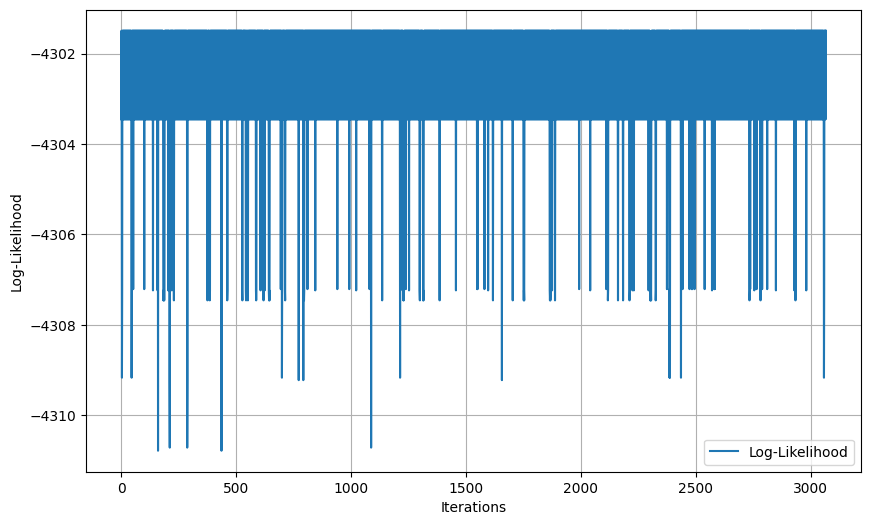

AttributeError: 'NoneType' object has no attribute 'summary'

In [ ]:
# ACP w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

## DIFFUSION MODEL

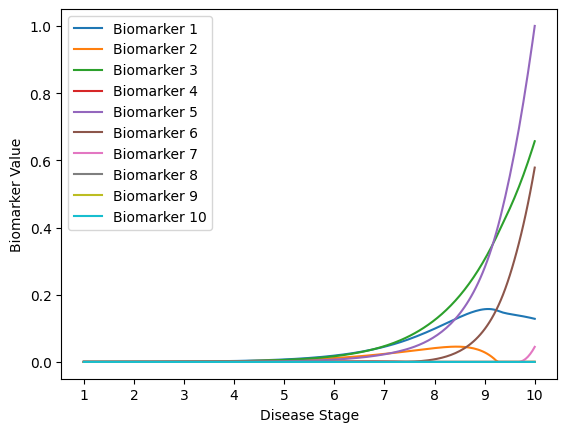

AttributeError: 'CanonicalGenerator' object has no attribute 'get_prio'

In [3]:
n_biomarker_stages = 10
model_type = 'diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=3)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prio
r()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [3]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [2 9 6 3 7 8 5 0 4 1]


100%|██████████| 10000/10000 [00:02<00:00, 3630.44it/s]


Greedy Ascent Result: [8 7 9 4 1 6 0 5 3 2]


 28%|██▊       | 140568/500000 [00:39<01:39, 3609.37it/s]/home/dsemchin/Progression_models_simulations/simulation_class/ebm/mcmc.py:106: RuntimeWarning: overflow encountered in scalar divide
  if delta_loglike > 0 or np.exp(delta_loglike / temperature) > random.random_sample():
100%|██████████| 500000/500000 [02:20<00:00, 3566.28it/s]

[0 1 2 3 4 5 6 7 8 9]
[8 7 9 4 1 6 0 5 3 2]
Best Order: [8 7 9 4 1 6 0 5 3 2]
Spearman's Rho: None
Kendall's Tau: SignificanceResult(statistic=-0.5111111111111111, pvalue=0.04662257495590829)


## REACTION DIFFUSION

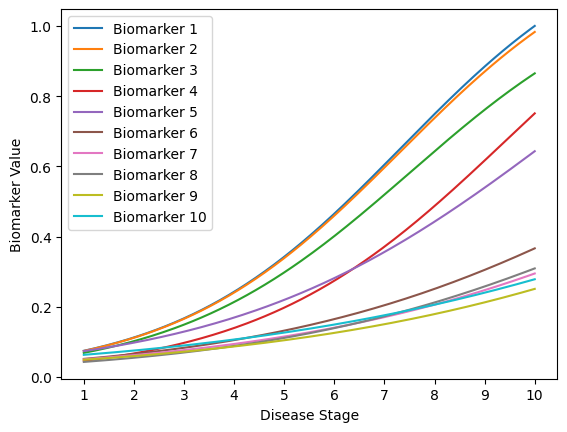

In [2]:
n_biomarker_stages = 10
model_type = 'reaction_diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=10)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=10, skewness=-1)
patient_samples = sample_generator.patient_samples

In [3]:
# RD No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

Starting Order: [7 3 5 9 8 6 0 2 4 1]


100%|██████████| 10000/10000 [00:02<00:00, 3587.20it/s]


Greedy Ascent Result: [8 7 6 9 5 3 4 2 1 0]


 28%|██▊       | 140266/500000 [00:40<01:41, 3544.87it/s]/home/dsemchin/Progression_models_simulations/simulation_class/ebm/mcmc.py:106: RuntimeWarning: overflow encountered in scalar divide
  if delta_loglike > 0 or np.exp(delta_loglike / temperature) > random.random_sample():
100%|██████████| 500000/500000 [02:22<00:00, 3496.83it/s]

[0 1 2 3 4 5 6 7 8 9]
[8 7 6 9 5 3 4 2 1 0]
Best Order: [8 7 6 9 5 3 4 2 1 0]
Spearman's Rho: None
Kendall's Tau: SignificanceResult(statistic=-0.8222222222222221, pvalue=0.0003576940035273369)


In [10]:
from scipy.stats import spearmanr
print(spearmanr([0,1,2,3,4,5,6,7,8,9],[1,2,0,3,5,4,8,9,6,7]))

SignificanceResult(statistic=0.8545454545454544, pvalue=0.0016368033159867143)


In [13]:
# RD w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3498.43it/s]


Greedy Ascent Result: [1 2 0 3 5 4 8 9 6 7]


100%|██████████| 500000/500000 [02:22<00:00, 3503.37it/s]


AttributeError: 'NoneType' object has no attribute 'summary'

## ODE demo

self.time_points length: 203, self.model_values[0] length: 203
self.time_points length: 203, self.model_values[1] length: 203
self.time_points length: 203, self.model_values[2] length: 203
self.time_points length: 203, self.model_values[3] length: 203
self.time_points length: 203, self.model_values[4] length: 203
self.time_points length: 203, self.model_values[5] length: 203
self.time_points length: 203, self.model_values[6] length: 203
self.time_points length: 203, self.model_values[7] length: 203
self.time_points length: 203, self.model_values[8] length: 203
self.time_points length: 203, self.model_values[9] length: 203


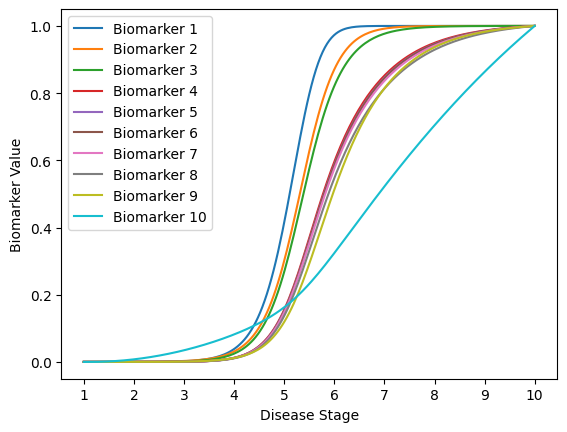

In [6]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=11)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [7]:
# Logistic No Priors
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3681.94it/s]


Greedy Ascent Result: [0 1 2 5 8 6 7 3 4 9]


100%|██████████| 500000/500000 [02:22<00:00, 3520.50it/s]

Best Order: [0 1 2 3 8 6 4 5 7 9]
Spearman's Rho: None
Kendall's Tau: 0.7333333333333333


In [8]:
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3500.36it/s]


Greedy Ascent Result: [0 1 2 3 8 6 4 5 7 9]


100%|██████████| 500000/500000 [02:24<00:00, 3468.17it/s]


AttributeError: 'NoneType' object has no attribute 'summary'